<a href="https://colab.research.google.com/github/praveen2111/wheat-heads-detection/blob/main/Wheat_Heads_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to end Wheat Heads Detection.
So, In this project we are building a Deep Learning Model which is capable to detect wheat heads from images using Detectron2, Weights and biases for experimentation.

## Problem
Detect wheat heads from the images and make a bounding box. For example, Someone took a picture of the wheat field and we will be able to detect wheat heads from the image.

## Data
We are using a Data from the Global Wheat Detection Kaggle competetion.

We have a total of 3,422 training images and 10 testing images.

## Evaluation
The Evaluation is the mean average precision at different IOU threshold.

## Downloading and Saving the Dataset

In [ ]:
#!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#!cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !pip uninstall -y kaggle
# !pip install --upgrade pip
# !pip install kaggle==1.5.6
# !kaggle -v

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
  Using cached kaggle-1.5.6-py3-none-any.whl
Kaggle API 1.5.6


In [ ]:
#!kaggle competitions download -c global-wheat-detection

 98% 593M/607M [00:11<00:00, 72.3MB/s]
100% 607M/607M [00:11<00:00, 56.2MB/s]


In [ ]:
#!unzip /content/global-wheat-detection.zip -d "/content/drive/MyDrive/Wheat Heads Detection"                                                            

Archive:  /content/global-wheat-detection.zip
  inflating: /content/drive/MyDrive/Wheat Heads Detection/sample_submission.csv  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/2fd875eaa.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/348a992bb.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/51b3e36ab.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/51f1be19e.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/53f253011.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/796707dd7.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/aac893a91.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/cb8d261a3.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/cc3532ff6.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/test/f5a1f0358.jpg  
  inflating: /content/drive/MyDrive/Wheat Heads Detection/train.csv  
  inflating:

## Getting our Workspace Ready!

In [1]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install cpython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

!pip install --upgrade git+git://github.com/wandb/client.git

!pip install --upgrade matplotlib

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 64.9MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 276kB 12.2MB/s 
  Created wheel for cpython: filename=cPython-0.0.6-cp36-none-any.whl size=4913 sha256=d634608222e123ffdba1567ff84ac706f848dc5c651afbaa4d90d64958247730
  Stored in directory: /root/.cache/pip/wheels/96/a8/ca/1e4bbac2c17f655877b9abcb468bc67fb14ce349da01e48372
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=89415cfc3f40b93c416315d566d6f846a9425a15b743e0599461b4281d267a29
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/152

  Cloning git://github.com/wandb/client.git to /tmp/pip-req-build-8ievzkug
  Running command git clone -q git://github.com/wandb/client.git /tmp/pip-req-build-8ievzkug
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 6.7MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
     |████████████████████████████████| 163kB 28.0MB/s 
     |████████████████████████████████| 133kB 43.9MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
  Created wheel for wandb: filename=wandb-0.10.13.dev1-cp36-none-any.whl size=1808604 sha256=c25bfa3c684b68ce16d9b45349593f6d942e0de25e15131edfb4e68f117887f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-cwn92sto/wheels/f5/bb/45/4b2ff6f79b35baf639a4eaf2673c5df97fa21335bf82cc7bfa
Successfully built wandb
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6490 sha256=0770aac28825b4b037924dc

In [1]:
# Importing detectron2 & torch

import detectron2
import torch
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer, HookBase
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog, build_detection_test_loader
from detectron2.structures import BoxMode
from detectron2.utils.events import get_event_storage
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

# Importing some common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import  train_test_split
import wandb
from ast import literal_eval
import cv2
import os
import glob



** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
# converting string to list.
literal_eval('[1,2,3]')

[1, 2, 3]

In [3]:
!wandb login 2fc959241113dde26ffa75ecffa7f3bd70df2d12

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Wheat Heads Detection/train.csv")
dataset

image_id  width  height                         bbox     source
0       b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]    usask_1
1       b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]    usask_1
2       b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]    usask_1
3       b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]    usask_1
4       b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]    usask_1
...           ...    ...     ...                          ...        ...
147788  5e0747034   1024    1024    [64.0, 619.0, 84.0, 95.0]  arvalis_2
147789  5e0747034   1024    1024  [292.0, 549.0, 107.0, 82.0]  arvalis_2
147790  5e0747034   1024    1024  [134.0, 228.0, 141.0, 71.0]  arvalis_2
147791  5e0747034   1024    1024   [430.0, 13.0, 184.0, 79.0]  arvalis_2
147792  5e0747034   1024    1024   [875.0, 740.0, 94.0, 61.0]  arvalis_2

[147793 rows x 5 columns]

In [5]:
dataset['image_id'] = dataset['image_id'] + '.jpg'

## Data Exploration

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147793 entries, 0 to 147792
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  147793 non-null  object
 1   width     147793 non-null  int64 
 2   height    147793 non-null  int64 
 3   bbox      147793 non-null  object
 4   source    147793 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


In [7]:
print(f"The total number of unique images are : {dataset['image_id'].nunique()}")

The total number of unique images are : 3373


## Data Visualization

In [ ]:
fig = px.histogram(dataset,x='source')
fig

In [ ]:
dataset['image_id'].value_counts()

35b935b6c.jpg    116
f1794c924.jpg    108
f79336a8e.jpg    104
134d4a01c.jpg    101
4cf91995d.jpg     97
                ... 
4e6c05213.jpg      1
47a1184e4.jpg      1
22f341965.jpg      1
79c8a1627.jpg      1
6a62af644.jpg      1
Name: image_id, Length: 3373, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Histogram(x=dataset['image_id'].value_counts())])
fig

## Image Visualizations

In [8]:
def show_images(images_id):

  for image_id in images_id:

    img_path = '/content/drive/MyDrive/Wheat Heads Detection/train/'+image_id

    img = plt.imread(img_path)

    bboxs = [literal_eval(box) for box in dataset[dataset['image_id']==image_id]['bbox']]

    for bbox in bboxs:
      
      bbox = list(map(int,bbox))
                         
      cv2.rectangle(img, (bbox[0],bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]),(0,255,0), 2)  #(x,y),(x+w, y+h)

    plt.imshow(img)
    plt.show()

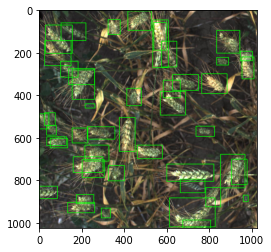

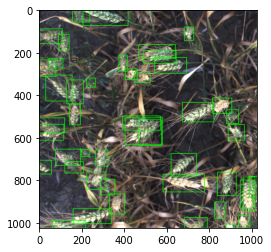

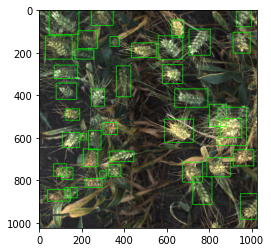

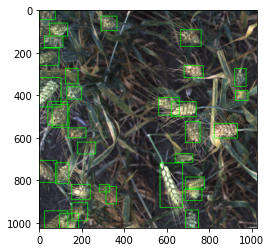

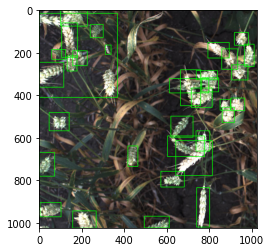

In [ ]:
show_images(dataset['image_id'].unique()[:5])

## Making Training and Validation Data

In [9]:
dataset['image_category_id'] = dataset.groupby("image_id").ngroup()
dataset

image_id  width  ...     source image_category_id
0       b6ab77fd7.jpg   1024  ...    usask_1              2408
1       b6ab77fd7.jpg   1024  ...    usask_1              2408
2       b6ab77fd7.jpg   1024  ...    usask_1              2408
3       b6ab77fd7.jpg   1024  ...    usask_1              2408
4       b6ab77fd7.jpg   1024  ...    usask_1              2408
...               ...    ...  ...        ...               ...
147788  5e0747034.jpg   1024  ...  arvalis_2              1228
147789  5e0747034.jpg   1024  ...  arvalis_2              1228
147790  5e0747034.jpg   1024  ...  arvalis_2              1228
147791  5e0747034.jpg   1024  ...  arvalis_2              1228
147792  5e0747034.jpg   1024  ...  arvalis_2              1228

[147793 rows x 6 columns]

## Splitting our Dataset into Training and Validation.

In [10]:
unique_imgs_id = dataset['image_id'].unique()

train_imgs_id, val_imgs_id = train_test_split(unique_imgs_id, test_size=0.1, shuffle=False)

train_df = dataset[dataset['image_id'].isin(train_imgs_id)]
val_df = dataset[dataset['image_id'].isin(val_imgs_id)]

In [11]:
train_df, val_df

(             image_id  width  ...   source image_category_id
 0       b6ab77fd7.jpg   1024  ...  usask_1              2408
 1       b6ab77fd7.jpg   1024  ...  usask_1              2408
 2       b6ab77fd7.jpg   1024  ...  usask_1              2408
 3       b6ab77fd7.jpg   1024  ...  usask_1              2408
 4       b6ab77fd7.jpg   1024  ...  usask_1              2408
 ...               ...    ...  ...      ...               ...
 137427  ce2e2fe79.jpg   1024  ...   rres_1              2713
 137428  ce2e2fe79.jpg   1024  ...   rres_1              2713
 137429  ce2e2fe79.jpg   1024  ...   rres_1              2713
 137430  ce2e2fe79.jpg   1024  ...   rres_1              2713
 137431  ce2e2fe79.jpg   1024  ...   rres_1              2713
 
 [137432 rows x 6 columns],
              image_id  width  ...     source image_category_id
 137432  89fe13786.jpg   1024  ...     rres_1              1787
 137433  89fe13786.jpg   1024  ...     rres_1              1787
 137434  89fe13786.jpg   1024  ...

In [12]:
train_imgs_id.shape, val_imgs_id.shape

((3035,), (338,))

In [13]:
# Creating a function to take a dataframe and return the list of dictionaries which contain all the information of our images and bounding boxes in COCO data format.
def get_dataset_dics(df):

  dataset_dics=[]

  for img_id in df.groupby('image_id'):

    annotation_list=[]

    for bbox in img_id[1]['bbox']:

      bbox_list = literal_eval(bbox)

      ann_dict = {'bbox':bbox_list,
                  'bbox_mode':BoxMode.XYWH_ABS,
                  'category_id':0,
                  'iscrowd':0}

      annotation_list.append(ann_dict)

    image_dict = {'annotations':annotation_list,
                  'file_name':'/content/drive/MyDrive/Wheat Heads Detection/train/'+img_id[0],
                  'height':1024,
                  'width':1024,
                  'image_id':int(img_id[1]['image_category_id'].values[0])}

    dataset_dics.append(image_dict)

  return dataset_dics

In [14]:
train_dict = get_dataset_dics(train_df)
valid_dict = get_dataset_dics(val_df)

In [15]:
train_dict[1]

{'annotations': [{'bbox': [765.0, 879.0, 116.0, 79.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [84.0, 539.0, 153.0, 96.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [855.0, 781.0, 96.0, 76.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [798.0, 934.0, 133.0, 88.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [330.0, 395.0, 145.0, 215.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [0.0, 0.0, 72.0, 106.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [711.0, 60.0, 138.0, 97.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [157.0, 393.0, 220.0, 108.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [967.0, 545.0, 57.0, 139.0],
   'bb

In [16]:
valid_dict[0]

{'annotations': [{'bbox': [322.0, 46.0, 90.0, 146.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [514.0, 217.0, 90.0, 87.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [586.0, 17.0, 123.0, 116.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [322.0, 906.0, 81.0, 73.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [437.0, 414.0, 146.0, 136.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [0.0, 345.0, 115.0, 77.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [970.0, 215.0, 54.0, 94.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [555.0, 524.0, 146.0, 116.0],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [266.0, 271.0, 100.0, 136.0],
   '

## Registering our Training and Validation Set

In [17]:
TRAIN_DATASET_NAME = 'wheat_train'
VALID_DATASET_NAME = 'wheat_val'

DatasetCatalog.register(TRAIN_DATASET_NAME, lambda : get_dataset_dics(train_df))
MetadataCatalog.get(TRAIN_DATASET_NAME).set(thing_classes=['wheat heads'])

DatasetCatalog.register(VALID_DATASET_NAME, lambda : get_dataset_dics(val_df))
MetadataCatalog.get(VALID_DATASET_NAME).set(thing_classes=['wheat heads'])

Metadata(name='wheat_val', thing_classes=['wheat heads'])

In [18]:
train_metadata = MetadataCatalog.get(TRAIN_DATASET_NAME)
train_metadata

Metadata(name='wheat_train', thing_classes=['wheat heads'])

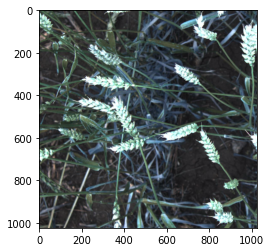

In [19]:
img = cv2.imread('/content/drive/MyDrive/Wheat Heads Detection/train/005b0d8bb.jpg')
plt.imshow(img)

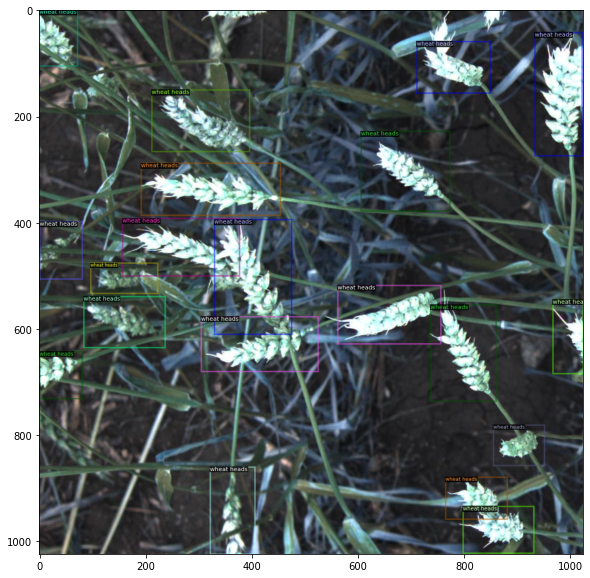

In [20]:
visualizer = Visualizer(img, metadata=train_metadata, scale=1)

vis = visualizer.draw_dataset_dict(train_dict[1])
plt.figure(figsize=(10,10))
plt.imshow(vis.get_image())

## Creating our Model

In [ ]:
cfg = get_cfg()

# Set our Architecture and weights
model_path = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(model_path))

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)

#Putting training and validation data
cfg.DATASETS.TRAIN = (TRAIN_DATASET_NAME,)
cfg.DATASETS.TEST = (VALID_DATASET_NAME,)

# Setting bath size, number of classes and threshold, learning rate...etc
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 100
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.MODEL.ROI_HEADS.NUM_CLASSES=1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.1

cfg.MODEL.RETINANET.NUM_CLASSES = 1

cfg.OUTPUT_DIR = 'output/faster_rcnn'

os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)

trainer=DefaultTrainer(cfg)

[12/14 11:20:33 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

####1. EPOCH = MAX_ITER*BATCH_SIZE/TOTAL_NUM_IMAGES
####2. EPOCHTOTAL_NUM_IMAGES=MAX_ITERBATCH_SIZE
####3. (EPOCH*TOTAL_NUM_IMAGES)/BATCH_SIZE = MAX_ITER
####(1*3035)/2=1517

## Training Model for 1 epoch

In [ ]:
cfg = get_cfg()

# Set our Architecture and weights
model_path = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(model_path))

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)

#Putting training and validation data
cfg.DATASETS.TRAIN = (TRAIN_DATASET_NAME,)
cfg.DATASETS.TEST = (VALID_DATASET_NAME,)

# Setting bath size, number of classes and threshold, learning rate...etc
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.MODEL.ROI_HEADS.NUM_CLASSES=1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.1

cfg.MODEL.RETINANET.NUM_CLASSES = 1

cfg.OUTPUT_DIR = 'output/faster_rcnn'

os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)

trainer=DefaultTrainer(cfg)

[12/14 13:05:37 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [ ]:
model_zoo.get_config_file("COCO-Detection/retinanet_R_101_FPN_3x.yaml")

'/usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/retinanet_R_101_FPN_3x.yaml'

## Retinanet Training

In [ ]:
cfg = get_cfg()

# Set our Architecture and weights
model_path = "COCO-Detection/retinanet_R_101_FPN_3x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(model_path))

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)

#Putting training and validation data
cfg.DATASETS.TRAIN = (TRAIN_DATASET_NAME,)
cfg.DATASETS.TEST = (VALID_DATASET_NAME,)

# Setting bath size, number of classes and threshold, learning rate...etc
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 500
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.MODEL.RETINANET.NUM_CLASSES=1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.1

cfg.OUTPUT_DIR = 'output/retinanet'

os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)

trainer=DefaultTrainer(cfg)

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[12/15 11:18:37 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

## Making a callback

In [ ]:
class WandbCallback(HookBase):

  def __init__(self, cfg, VALID_DATASET_NAME, trainer, train_metadata, imgs_paths):
    super().__init__

    # Setting up all of our parameters
    self.cfg = cfg
    self.VALID_DATASET_NAME = VALID_DATASET_NAME
    self.trainer = trainer
    self.train_metadata = train_metadata
    self.imgs_paths = imgs_paths

  # Function to run every iteration, for sending all metrics to weights & biases
  def after_step(self):

    storage = get_event_storage()

    values = storage.latest().items()

    wandb.log(dict(values))

    if self.trainer.iter % 50 == 0:

      self.trainer.model.eval()

      for img_path in imgs_paths:

        image = cv2.imread(img_path)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        with torch.no_grad():
          outputs = self.trainer.model([
                                        {"image":torch.from_numpy(image.transpose(2, 0, 1))}
          ]) 

        
        box_data = []

        for count, bbox in enumerate(outputs[0]['instances'].pred_boxes.tensor.cpu().numpy()):

          box_data.append({"position":{
              "minX":int(bbox[0]),
              "maxX":int(bbox[2]),
              "minY":int(bbox[1]),
              "maxY":int(bbox[3])
          },
          "class_id":0,
          "domain":"pixel",
          "box_caption":str(outputs[0]['instances'].scores.cpu().numpy()[count]),
          "scores":{"predictions":float(outputs[0]['instances'].scores.cpu().numpy()[count])}
          })

        boxes = {"predictions":{
            "box_data":box_data,
            "class_labels":{0:"Wheat Heads"}
        }}

        wandb.log({img_path.split('/')[-1]:wandb.Image(image, boxes=boxes)})


      self.trainer.model.train()

    
  # Called after the model training is completed, to evaluate our model using validation dataset
  def after_train(self):

    evaluator = COCOEvaluator(self.VALID_DATASET_NAME, self.cfg, False, output_dir=self.cfg.OUTPUT_DIR)

    val_loader = build_detection_test_loader(self.cfg, self.VALID_DATASET_NAME,)

    valResults = inference_on_dataset(self.trainer.model, val_loader, evaluator)

    wandb.log(dict(valResults['bbox']))


### Setting up Callbacks

In [ ]:
imgs_paths =  glob.glob("/content/drive/MyDrive/Wheat Heads Detection/test/*.jpg")[:5]
imgs_paths

wandb_callback = WandbCallback(cfg, VALID_DATASET_NAME, trainer, train_metadata,imgs_paths)

trainer.register_hooks([wandb_callback])

trainer.resume_or_load(resume=False)


model_final_971ab9.pkl: 228MB [00:03, 63.5MB/s]                           
Skip loading parameter 'head.cls_score.weight' to the model due to incompatible shapes: (720, 256, 3, 3) in the checkpoint but (9, 256, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'head.cls_score.bias' to the model due to incompatible shapes: (720,) in the checkpoint but (9,) in the model! You might want to double check if this is expected.


## Setting up Wandb

In [ ]:
wandb.init(project='Wheat Detection', config=cfg.copy(), name='retinanet',notes='Training First retinanet model')

wandb: Currently logged in as: manikanta_a (use `wandb login --relogin` to force relogin)


## Training our Model

In [ ]:
trainer.train()

[12/15 11:18:47 d2.engine.train_loop]: Starting training from iteration 0
[12/15 11:19:04 d2.utils.events]:  eta: 0:03:28  iter: 19  total_loss: 2.654  loss_cls: 1.847  loss_box_reg: 0.834  time: 0.4327  data_time: 0.0572  lr: 0.000050  max_mem: 2426M
[12/15 11:19:12 d2.utils.events]:  eta: 0:03:19  iter: 39  total_loss: 1.303  loss_cls: 0.803  loss_box_reg: 0.465  time: 0.4267  data_time: 0.0161  lr: 0.000100  max_mem: 2426M
[12/15 11:19:24 d2.utils.events]:  eta: 0:03:10  iter: 59  total_loss: 1.021  loss_cls: 0.609  loss_box_reg: 0.447  time: 0.4212  data_time: 0.0107  lr: 0.000150  max_mem: 2426M
[12/15 11:19:33 d2.utils.events]:  eta: 0:03:02  iter: 79  total_loss: 0.869  loss_cls: 0.414  loss_box_reg: 0.428  time: 0.4263  data_time: 0.0085  lr: 0.000200  max_mem: 2445M
[12/15 11:19:42 d2.utils.events]:  eta: 0:02:54  iter: 99  total_loss: 0.693  loss_cls: 0.323  loss_box_reg: 0.379  time: 0.4334  data_time: 0.0088  lr: 0.000250  max_mem: 2445M
[12/15 11:19:54 d2.utils.events]:  e

## Loading Model and Making Predictions

In [ ]:
cfg.OUTPUT_DIR

'output/retinanet'

In [ ]:
cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + '/model_final.pth'

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.7
cfg.MODEL.RETINANET.SCORE_THRESH_TEST=0.5

predictor = DefaultPredictor(cfg)

In [ ]:
imgs_paths

['/content/drive/MyDrive/Wheat Heads Detection/test/348a992bb.jpg',
 '/content/drive/MyDrive/Wheat Heads Detection/test/2fd875eaa.jpg',
 '/content/drive/MyDrive/Wheat Heads Detection/test/51b3e36ab.jpg',
 '/content/drive/MyDrive/Wheat Heads Detection/test/aac893a91.jpg',
 '/content/drive/MyDrive/Wheat Heads Detection/test/51f1be19e.jpg']

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Wheat Heads Detection/test/348a992bb.jpg')

outputs = predictor(image)

In [ ]:
outputs

{'instances': Instances(num_instances=32, image_height=1024, image_width=1024, fields=[pred_boxes: Boxes(tensor([[ 455.8112,  652.2440,  532.4495,  734.7556],
         [ 736.6139,  223.3255,  870.3042,  303.6200],
         [ 543.3366,   29.5795,  619.7757,  126.0884],
         [ 136.4811,   38.4434,  251.9549,  121.8377],
         [  90.4202,  210.8541,  191.1942,  284.5328],
         [ 917.8975,  557.4708, 1000.7656,  653.3856],
         [ 282.7021,  335.6999,  365.0409,  423.3962],
         [ 597.1644,  444.4299,  718.8091,  538.9984],
         [ 408.4175,  506.6433,  490.2040,  595.5378],
         [   1.7039,  469.9615,  135.3225,  560.7501],
         [ 302.4121,  167.5072,  394.0188,  268.3493],
         [ 935.7070,  785.3306, 1017.2476,  865.8625],
         [   1.8877,  316.8711,  119.7861,  411.9610],
         [ 667.3831,  392.5607,  775.3416,  465.4325],
         [   2.1329,  415.3340,   76.7425,  482.7870],
         [ 559.6820,  744.7913,  637.9723,  834.1833],
         [ 112.7

In [ ]:
outputs['instances'].pred_boxes

Boxes(tensor([[ 455.8112,  652.2440,  532.4495,  734.7556],
        [ 736.6139,  223.3255,  870.3042,  303.6200],
        [ 543.3366,   29.5795,  619.7757,  126.0884],
        [ 136.4811,   38.4434,  251.9549,  121.8377],
        [  90.4202,  210.8541,  191.1942,  284.5328],
        [ 917.8975,  557.4708, 1000.7656,  653.3856],
        [ 282.7021,  335.6999,  365.0409,  423.3962],
        [ 597.1644,  444.4299,  718.8091,  538.9984],
        [ 408.4175,  506.6433,  490.2040,  595.5378],
        [   1.7039,  469.9615,  135.3225,  560.7501],
        [ 302.4121,  167.5072,  394.0188,  268.3493],
        [ 935.7070,  785.3306, 1017.2476,  865.8625],
        [   1.8877,  316.8711,  119.7861,  411.9610],
        [ 667.3831,  392.5607,  775.3416,  465.4325],
        [   2.1329,  415.3340,   76.7425,  482.7870],
        [ 559.6820,  744.7913,  637.9723,  834.1833],
        [ 112.7306,  928.1335,  203.2961,  998.4968],
        [ 378.8012,  214.3325,  468.8960,  293.6397],
        [  46.2707,  2

In [ ]:
outputs['instances'].scores

tensor([0.9366, 0.9336, 0.9119, 0.9081, 0.9051, 0.9045, 0.9019, 0.8947, 0.8881,
        0.8732, 0.8601, 0.8513, 0.8502, 0.8395, 0.8246, 0.8183, 0.7976, 0.7976,
        0.7954, 0.7893, 0.7838, 0.7609, 0.7422, 0.7152, 0.6976, 0.6914, 0.6898,
        0.6429, 0.6330, 0.6060, 0.5702, 0.5672], device='cuda:0')

In [ ]:
outputs['instances'].to("cpu")

Instances(num_instances=32, image_height=1024, image_width=1024, fields=[pred_boxes: Boxes(tensor([[ 455.8112,  652.2440,  532.4495,  734.7556],
        [ 736.6139,  223.3255,  870.3042,  303.6200],
        [ 543.3366,   29.5795,  619.7757,  126.0884],
        [ 136.4811,   38.4434,  251.9549,  121.8377],
        [  90.4202,  210.8541,  191.1942,  284.5328],
        [ 917.8975,  557.4708, 1000.7656,  653.3856],
        [ 282.7021,  335.6999,  365.0409,  423.3962],
        [ 597.1644,  444.4299,  718.8091,  538.9984],
        [ 408.4175,  506.6433,  490.2040,  595.5378],
        [   1.7039,  469.9615,  135.3225,  560.7501],
        [ 302.4121,  167.5072,  394.0188,  268.3493],
        [ 935.7070,  785.3306, 1017.2476,  865.8625],
        [   1.8877,  316.8711,  119.7861,  411.9610],
        [ 667.3831,  392.5607,  775.3416,  465.4325],
        [   2.1329,  415.3340,   76.7425,  482.7870],
        [ 559.6820,  744.7913,  637.9723,  834.1833],
        [ 112.7306,  928.1335,  203.2961,  99

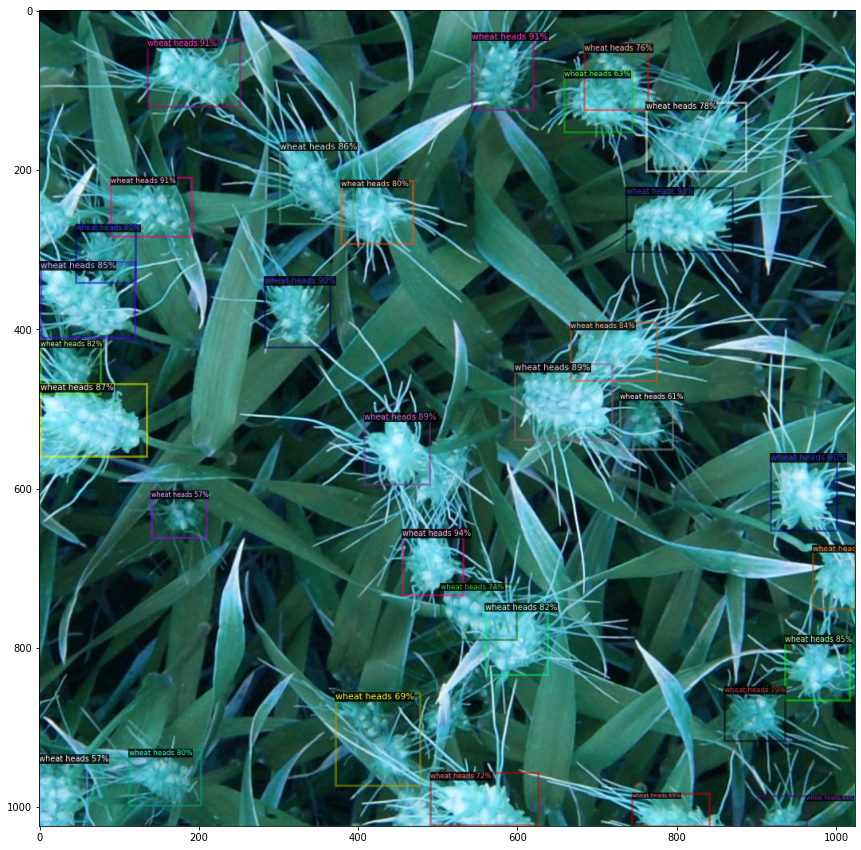

In [ ]:
visualizer = Visualizer(image,
                        metadata=train_metadata,
                        scale=1.0)

visualizer =visualizer.draw_instance_predictions(outputs['instances'].to("cpu"))
plt.figure(figsize=(15,15))
plt.imshow(visualizer.get_image())

## Make Predictions on Test Dataset and Saving it into CSV format

In [ ]:
sample_submission_df = pd.read_csv("/content/drive/MyDrive/Wheat Heads Detection/sample_submission.csv")
sample_submission_df

image_id PredictionString
0  aac893a91    1.0 0 0 50 50
1  51f1be19e    1.0 0 0 50 50
2  f5a1f0358    1.0 0 0 50 50
3  796707dd7    1.0 0 0 50 50
4  51b3e36ab    1.0 0 0 50 50
5  348a992bb    1.0 0 0 50 50
6  cc3532ff6    1.0 0 0 50 50
7  2fd875eaa    1.0 0 0 50 50
8  cb8d261a3    1.0 0 0 50 50
9  53f253011    1.0 0 0 50 50

In [ ]:
results = []
for image_id in sample_submission_df['image_id']:

  img = cv2.imread("/content/drive/MyDrive/Wheat Heads Detection/test/"+image_id+'.jpg')

  outputs = predictor(img)['instances']

  boxes = outputs.pred_boxes.tensor.cpu().numpy()

  scores = outputs.scores.cpu().numpy()

  prediction_string = []

  for bbox, score in zip(boxes,scores):

    bbox[3] -= bbox[1]
    bbox[2] -= bbox[0]

    bbox = list(map(int, bbox))
    
    score = round(score, 4)

    prediction_string.append(score)
    prediction_string.extend(bbox)

  result = {'image_id':image_id, "prediction_string":' '.join(map(str, prediction_string))}

  results.append(result)

In [ ]:
results

[{'image_id': 'aac893a91',
  'prediction_string': '0.8896 694 394 116 161 0.8885 620 915 71 107 0.8736 459 856 78 91 0.855 740 778 78 103 0.8465 561 71 124 177 0.8371 73 0 95 158 0.8335 28 452 102 153 0.8324 359 532 91 75 0.8145 564 537 114 176 0.8032 819 709 104 188 0.7824 237 844 128 80 0.7806 333 666 112 145 0.7501 588 777 92 116 0.7092 249 91 120 130 0.6605 177 578 108 162 0.6499 94 616 118 78 0.6346 53 854 126 74 0.5447 307 0 66 61 0.5289 387 333 92 86 0.5216 488 985 69 38 0.506 827 627 85 128'},
 {'image_id': '51f1be19e',
  'prediction_string': '0.762 610 82 158 171 0.7299 821 87 107 66 0.7231 700 921 82 78 0.6843 770 885 136 97 0.6804 295 478 114 108 0.6667 577 618 76 80 0.6635 896 678 113 82 0.6529 252 125 94 114 0.6449 654 794 102 76 0.6342 807 763 100 86 0.5977 840 272 133 192 0.5613 504 496 127 73 0.5555 27 0 76 68 0.5413 0 377 51 96 0.5216 561 469 137 82 0.5188 772 24 108 63 0.5103 694 624 64 50'},
 {'image_id': 'f5a1f0358',
  'prediction_string': '0.8914 287 456 161 101 0.

In [ ]:
results_df = pd.DataFrame(results)
results_df

image_id                                  prediction_string
0  aac893a91  0.8896 694 394 116 161 0.8885 620 915 71 107 0...
1  51f1be19e  0.762 610 82 158 171 0.7299 821 87 107 66 0.72...
2  f5a1f0358  0.8914 287 456 161 101 0.891 152 246 74 88 0.8...
3  796707dd7  0.8576 43 82 165 115 0.8132 899 328 103 87 0.7...
4  51b3e36ab  0.8899 875 184 127 81 0.8787 478 577 76 79 0.8...
5  348a992bb  0.9366 455 652 76 82 0.9336 736 223 133 80 0.9...
6  cc3532ff6  0.9282 559 830 120 173 0.9077 96 606 86 146 0....
7  2fd875eaa  0.9343 394 792 70 88 0.9073 944 647 74 101 0.9...
8  cb8d261a3  0.8941 587 33 80 85 0.8922 17 860 82 148 0.878...
9  53f253011  0.9083 909 743 73 82 0.9007 147 97 85 87 0.888...

In [ ]:
results_df.to_csv("result.csv",index=False)